# IDA_ML_Project_SS21

## Sanika NAIR
Matriculation NO:810566

## Predicting Creditworthiness
 #### The task is to predict creditworthiness of the Customers of a bank which can be accomplished by classifying the customers into two groups : Creditworthy and Non-Creditworthy.

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error,classification_report, confusion_matrix, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [2]:
#reading the data
df = pd.read_csv("kredit.dat", header=None, sep = "\t")
df.head()



,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A14,36,A32,?,2299,A63,?,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,?,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,?,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,?,2,A191,?,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1


###### By giving names to columns it will be easier to understand the data.

In [3]:
#giving columns meaningful names
df.columns=['Status','Duration_mon','Credit_Hist','Purpose','CreditAmt','Savings','Employment_Since',
'InstRate','Personal_SnS','Guarantors','Residence_Since','Property','Age','Other_InstPlans','Housing','NumCredits','Job','Dependents','Telephone','Foreign_Worker','Creditworthy']

###### Since there are some missing values :

In [4]:
#replacing ? with NaN for all the steps
df.replace('?', np.NaN, inplace = True)

In [5]:
df.head()

,Status,Duration_mon,Credit_Hist,Purpose,CreditAmt,Savings,Employment_Since,InstRate,Personal_SnS,Guarantors,...,Property,Age,Other_InstPlans,Housing,NumCredits,Job,Dependents,Telephone,Foreign_Worker,Creditworthy
0,A14,36,A32,NaN,2299,A63,NaN,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,NaN,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,NaN,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,NaN,2,A191,NaN,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1


## 2. Exploratory Data Analysis


######  Checking the Missing Values in Features.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Status            1000 non-null   object
 1   Duration_mon      1000 non-null   int64 
 2   Credit_Hist       1000 non-null   object
 3   Purpose           827 non-null    object
 4   CreditAmt         1000 non-null   int64 
 5   Savings           1000 non-null   object
 6   Employment_Since  504 non-null    object
 7   InstRate          1000 non-null   int64 
 8   Personal_SnS      1000 non-null   object
 9   Guarantors        1000 non-null   object
 10  Residence_Since   1000 non-null   int64 
 11  Property          1000 non-null   object
 12  Age               1000 non-null   int64 
 13  Other_InstPlans   1000 non-null   object
 14  Housing           1000 non-null   object
 15  NumCredits        1000 non-null   int64 
 16  Job               768 non-null    object
 17  Dependents     

<AxesSubplot:>

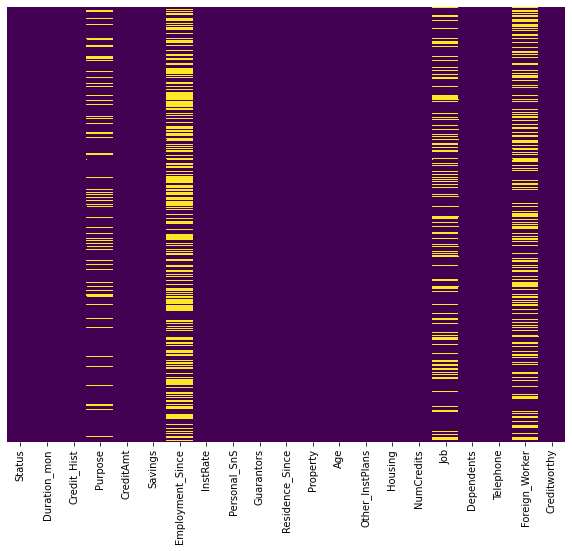

In [7]:
# Visualization of missing values
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

###### Counting the Missing Values in Features

In [8]:
df.isnull().sum()

Status                0
Duration_mon          0
Credit_Hist           0
Purpose             173
CreditAmt             0
Savings               0
Employment_Since    496
InstRate              0
Personal_SnS          0
Guarantors            0
Residence_Since       0
Property              0
Age                   0
Other_InstPlans       0
Housing               0
NumCredits            0
Job                 232
Dependents            0
Telephone             0
Foreign_Worker      360
Creditworthy          0
dtype: int64

array([[<AxesSubplot:title={'center':'Duration_mon'}>,
        <AxesSubplot:title={'center':'CreditAmt'}>,
        <AxesSubplot:title={'center':'InstRate'}>],
       [<AxesSubplot:title={'center':'Residence_Since'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'NumCredits'}>],
       [<AxesSubplot:title={'center':'Dependents'}>,
        <AxesSubplot:title={'center':'Creditworthy'}>, <AxesSubplot:>]],
      dtype=object)

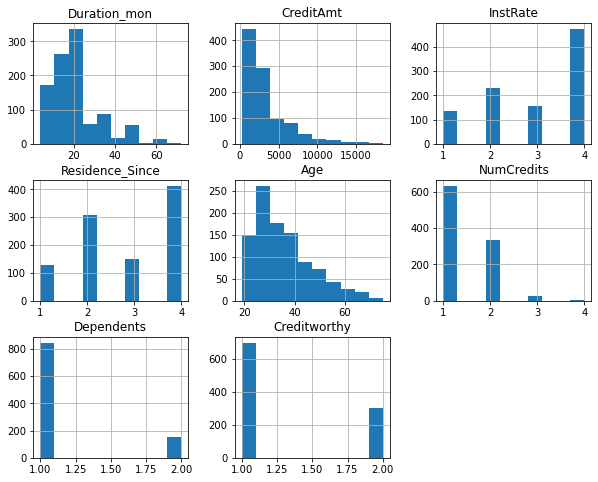

In [9]:
#Visualize distribution of nuemrical variables
df.hist(figsize=(10,8))

We can see the distribution of our numerical Features. 
Our column 'Age' is normally distributed and is skewed to the right.Some columns like ResidingSince, InstRate,NumCredits and Dependents have very few values which helps us to decide that the Dependents column can be dropped since it has very less variability.

<AxesSubplot:>

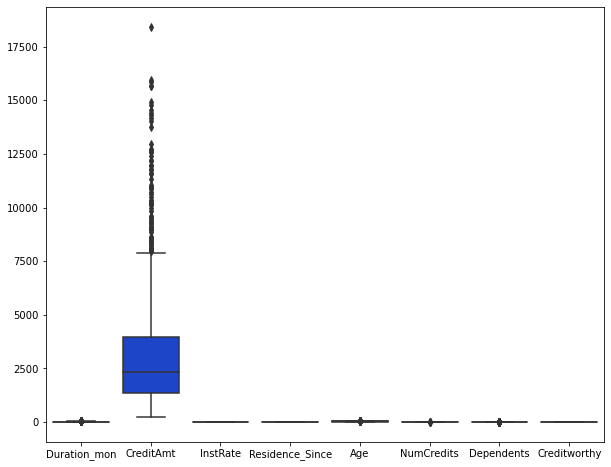

In [10]:
#Visualizing outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=df,palette='winter')


From the Box Plot we can see that 'CreditAmt' has the most outliers, this will be taken care of by normalization.

<AxesSubplot:>

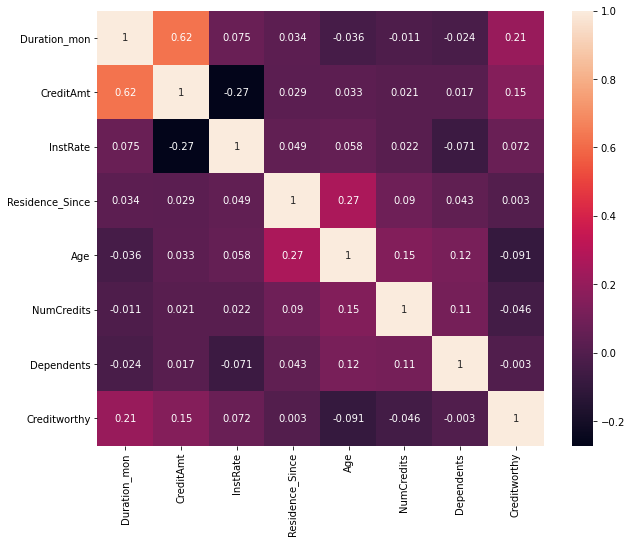

In [11]:
# visualizing correlation between numeric variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot= True)

Dependents and Residing_Since are going to be the least useful features to check if a customer is creditworthy.

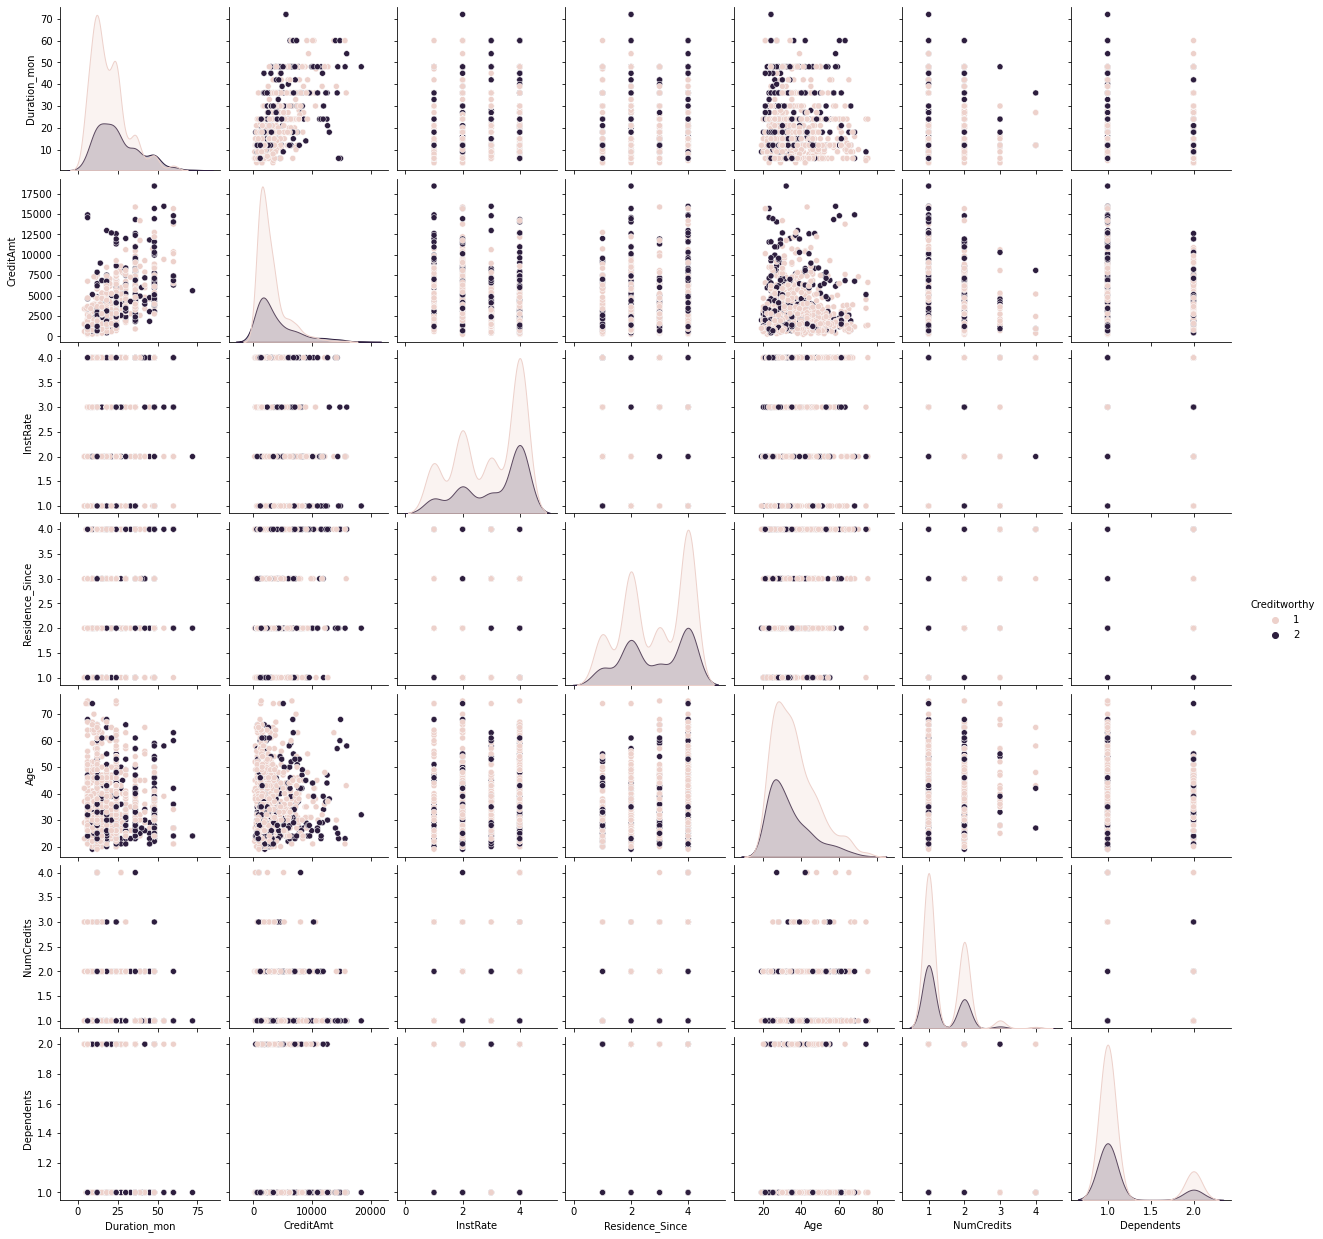

In [12]:
#visualizing rehttp://localhost:8888/notebooks/Machine%20Learning/Copy%20of%20project.ipynb#lationship between variables
sns.pairplot(df, hue = 'Creditworthy')

C:\Users\sanik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Creditworthy', ylabel='count'>

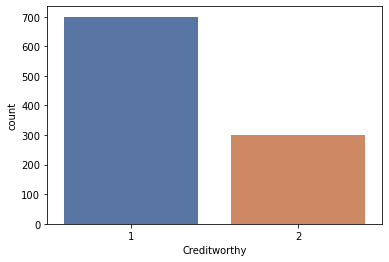

In [13]:
# Visualizing frequency of target variable
sns.countplot(df['Creditworthy'],palette = 'deep')

Out of 1000 Customers 700 of them are classified as Creditworthy and the rest 300 customers are Non-Creditworthy.

<AxesSubplot:xlabel='Creditworthy', ylabel='count'>

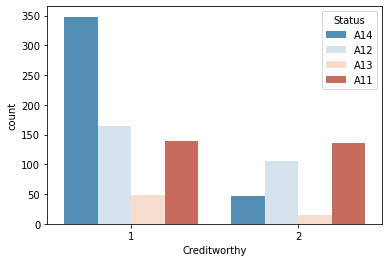

In [14]:
sns.countplot(x='Creditworthy',hue='Status',data=df,palette='RdBu_r')


People with no checking account are majorly seen to be Creditworthy and the customer with status A11 i.e the ones with less than 0 Euros in their checking account are Non-Creditworthy.

C:\Users\sanik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Guarantors', ylabel='count'>

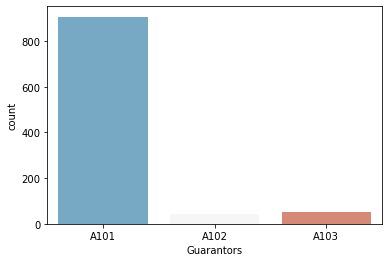

In [15]:
 sns.countplot(df['Guarantors'],palette='RdBu_r')


The data in the column of Guarantors doesn't show much variablity so it won't of much help to be a deciding feature. 
Now , the feature Telephone of our datast isn't of use too because it doesn't make sense to determine Creditworthiness with it.
So we can omit both these features.

## 3. Data Preprocessing 

### 3.1 Encoding of Categorical Variables 

In [16]:
#Creating dataset with one hot encoded labels for non missing categorical variables
cat = pd.get_dummies(df[['Status', 'Credit_Hist', 'Savings', 'Personal_SnS','Guarantors','Property', 'Other_InstPlans', 'Housing', 'Telephone' ]])
df = pd.concat([df, cat], axis = 1)
df.drop(['Status', 'Credit_Hist', 'Savings', 'Personal_SnS','Guarantors','Property', 'Other_InstPlans', 'Housing', 'Telephone' ], axis = 1, inplace= True)
df.head()


,Duration_mon,Purpose,CreditAmt,Employment_Since,InstRate,Residence_Since,Age,NumCredits,Job,Dependents,...,Property_A123,Property_A124,Other_InstPlans_A141,Other_InstPlans_A142,Other_InstPlans_A143,Housing_A151,Housing_A152,Housing_A153,Telephone_A191,Telephone_A192
0,36,NaN,2299,NaN,4,4,39,1,A173,1,...,1,0,0,0,1,0,1,0,1,0
1,18,A46,1239,A73,4,4,61,1,NaN,1,...,0,1,0,0,1,0,0,1,1,0
2,24,A40,947,A74,4,3,38,1,NaN,2,...,0,1,1,0,0,0,0,1,1,0
3,15,A43,1478,A73,4,3,33,2,A173,1,...,0,0,1,0,0,0,1,0,1,0
4,24,A40,1525,A74,4,3,34,1,A173,2,...,1,0,0,0,1,0,1,0,0,1


In [17]:
df.shape

(1000, 45)

We have 45 columns including the 4 missing categorical variables. To convert them into numeric, we will use Label encoding because it consists of missing values instead of one hot encoding.

In [18]:
df['Foreign_Worker']=df['Foreign_Worker'].map({'A201':1, 'A202':0})
df['Job']=df['Job'].map({'A171':0,'A172':1,'A173':2,'A174':3,})
df['Employment_Since']=df['Employment_Since'].map({'A71':0,'A72':1,'A73':2,'A74':3,'A75':4})
df['Purpose']=df['Purpose'].map({'A40':0,'A41':1,'A42':2,'A43':3,'A44':4,'A45':5,'A46':6, 'A47':7, 'A48':8, 'A49':9, 'A410':10})
df.head()


,Duration_mon,Purpose,CreditAmt,Employment_Since,InstRate,Residence_Since,Age,NumCredits,Job,Dependents,...,Property_A123,Property_A124,Other_InstPlans_A141,Other_InstPlans_A142,Other_InstPlans_A143,Housing_A151,Housing_A152,Housing_A153,Telephone_A191,Telephone_A192
0,36,NaN,2299,NaN,4,4,39,1,2.0,1,...,1,0,0,0,1,0,1,0,1,0
1,18,6.0,1239,2.0,4,4,61,1,NaN,1,...,0,1,0,0,1,0,0,1,1,0
2,24,0.0,947,3.0,4,3,38,1,NaN,2,...,0,1,1,0,0,0,0,1,1,0
3,15,3.0,1478,2.0,4,3,33,2,2.0,1,...,0,0,1,0,0,0,1,0,1,0
4,24,0.0,1525,3.0,4,3,34,1,2.0,2,...,1,0,0,0,1,0,1,0,0,1


### 3.2 Imputation of Missing Values
We use KNN imputer for our missing values.It works on the concept of K-nearest neighbours.A feature's missing value is imputed from the mean of n number of nearest neighbours found.Here I am setting the default value of n which is 5.

In [19]:
ip = KNNImputer()
new = pd.DataFrame(np.round(ip.fit_transform(df)),columns = df.columns)

In [20]:
new.head()

,Duration_mon,Purpose,CreditAmt,Employment_Since,InstRate,Residence_Since,Age,NumCredits,Job,Dependents,...,Property_A123,Property_A124,Other_InstPlans_A141,Other_InstPlans_A142,Other_InstPlans_A143,Housing_A151,Housing_A152,Housing_A153,Telephone_A191,Telephone_A192
0,36.0,4.0,2299.0,2.0,4.0,4.0,39.0,1.0,2.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,18.0,6.0,1239.0,2.0,4.0,4.0,61.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,24.0,0.0,947.0,3.0,4.0,3.0,38.0,1.0,2.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,15.0,3.0,1478.0,2.0,4.0,3.0,33.0,2.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.0,0.0,1525.0,3.0,4.0,3.0,34.0,1.0,2.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [21]:
#Ensure that there are no missing values
new.isnull().sum()

Duration_mon            0
Purpose                 0
CreditAmt               0
Employment_Since        0
InstRate                0
Residence_Since         0
Age                     0
NumCredits              0
Job                     0
Dependents              0
Foreign_Worker          0
Creditworthy            0
Status_A11              0
Status_A12              0
Status_A13              0
Status_A14              0
Credit_Hist_A30         0
Credit_Hist_A31         0
Credit_Hist_A32         0
Credit_Hist_A33         0
Credit_Hist_A34         0
Savings_A61             0
Savings_A62             0
Savings_A63             0
Savings_A64             0
Savings_A65             0
Personal_SnS_A91        0
Personal_SnS_A92        0
Personal_SnS_A93        0
Personal_SnS_A94        0
Guarantors_A101         0
Guarantors_A102         0
Guarantors_A103         0
Property_A121           0
Property_A122           0
Property_A123           0
Property_A124           0
Other_InstPlans_A141    0
Other_InstPl

In [22]:
#Inverse mapping to perform one hot encoding on initially missing value columns
new['Foreign_Worker']=new['Foreign_Worker'].map(dict(map(reversed, {'A201':1, 'A202':0}.items())))
new['Job']=new['Job'].map(dict(map(reversed, {'A171':0,'A172':1,'A173':2,'A174':3,}.items())))
new['Employment_Since']=new['Employment_Since'].map(dict(map(reversed, {'A71':0,'A72':1,'A73':2,'A74':3,'A75':4}.items())))
new['Purpose']=new['Purpose'].map(dict(map(reversed, {'A40':0,'A41':1,'A42':2,'A43':3,'A44':4,'A45':5,'A46':6, 'A47':7, 'A48':8, 'A49':9, 'A410':10}.items())))
new.head()


,Duration_mon,Purpose,CreditAmt,Employment_Since,InstRate,Residence_Since,Age,NumCredits,Job,Dependents,...,Property_A123,Property_A124,Other_InstPlans_A141,Other_InstPlans_A142,Other_InstPlans_A143,Housing_A151,Housing_A152,Housing_A153,Telephone_A191,Telephone_A192
0,36.0,A44,2299.0,A73,4.0,4.0,39.0,1.0,A173,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,18.0,A46,1239.0,A73,4.0,4.0,61.0,1.0,A172,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,24.0,A40,947.0,A74,4.0,3.0,38.0,1.0,A173,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,15.0,A43,1478.0,A73,4.0,3.0,33.0,2.0,A173,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.0,A40,1525.0,A74,4.0,3.0,34.0,1.0,A173,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [23]:
#One hot encoding the variables
catm = pd.get_dummies(new[['Purpose', 'Employment_Since', 'Job', 'Foreign_Worker' ]])
data = pd.concat([df, catm], axis = 1)
data.drop(['Purpose', 'Employment_Since', 'Job', 'Foreign_Worker' ], axis = 1, inplace=True)
data.head()


,Duration_mon,CreditAmt,InstRate,Residence_Since,Age,NumCredits,Dependents,Creditworthy,Status_A11,Status_A12,...,Employment_Since_A72,Employment_Since_A73,Employment_Since_A74,Employment_Since_A75,Job_A171,Job_A172,Job_A173,Job_A174,Foreign_Worker_A201,Foreign_Worker_A202
0,36,2299,4,4,39,1,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
1,18,1239,4,4,61,1,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
2,24,947,4,3,38,1,2,2,0,0,...,0,0,1,0,0,0,1,0,1,0
3,15,1478,4,3,33,2,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
4,24,1525,4,3,34,1,2,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [24]:
data.shape

(1000, 63)

In [25]:
type(data)

pandas.core.frame.DataFrame

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 63 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Duration_mon          1000 non-null   int64
 1   CreditAmt             1000 non-null   int64
 2   InstRate              1000 non-null   int64
 3   Residence_Since       1000 non-null   int64
 4   Age                   1000 non-null   int64
 5   NumCredits            1000 non-null   int64
 6   Dependents            1000 non-null   int64
 7   Creditworthy          1000 non-null   int64
 8   Status_A11            1000 non-null   uint8
 9   Status_A12            1000 non-null   uint8
 10  Status_A13            1000 non-null   uint8
 11  Status_A14            1000 non-null   uint8
 12  Credit_Hist_A30       1000 non-null   uint8
 13  Credit_Hist_A31       1000 non-null   uint8
 14  Credit_Hist_A32       1000 non-null   uint8
 15  Credit_Hist_A33       1000 non-null   uint8
 16  Credit_

### 3.3 Scaling 

Transforming features by scaling each feature to a given range. This scales and translates each feature individually such that it is in the given range on the training set.We do this so that feautures with higher values don't have superiority.Feature scaling is helpful to bring every feature in the same footing without any upfront importance.

In [27]:
#scaling the entire df 
normalized_df=(data-data.min())/(data.max()-data.min()) 
normalized_df.head()


,Duration_mon,CreditAmt,InstRate,Residence_Since,Age,NumCredits,Dependents,Creditworthy,Status_A11,Status_A12,...,Employment_Since_A72,Employment_Since_A73,Employment_Since_A74,Employment_Since_A75,Job_A171,Job_A172,Job_A173,Job_A174,Foreign_Worker_A201,Foreign_Worker_A202
0,0.470588,0.112743,1.0,1.000000,0.357143,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.205882,0.054418,1.0,1.000000,0.750000,0.000000,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.294118,0.038351,1.0,0.666667,0.339286,0.000000,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.161765,0.067569,1.0,0.666667,0.250000,0.333333,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.294118,0.070155,1.0,0.666667,0.267857,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## 3.4 Feature Selection 

In the EDA stage we figured out there are features with least potential to help us predict creitworthiness.
Here after seeing the less amount of variability the feature Foreign_Worker has we can omit it too.

C:\Users\sanik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Foreign_Worker', ylabel='count'>

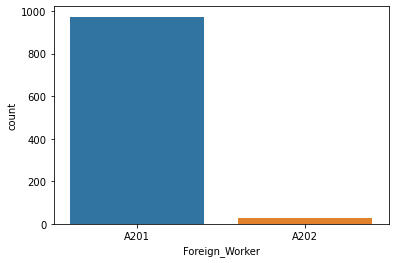

In [28]:
sns.countplot(new['Foreign_Worker'])

In [29]:
df_final = normalized_df.drop(['Dependents', 'Guarantors_A101','Guarantors_A102',
'Guarantors_A103',
'Telephone_A191', 'Telephone_A192', 'Foreign_Worker_A201', 'Foreign_Worker_A202'],axis = 1)


#### 3.4.1 Swapping labels

Our column creditworthy has 0 which represents creditworthy and 1 as not credit worthy. Let's swap them.

In [30]:
# undo it
df_final['Creditworthy'] = df_final['Creditworthy'].replace(1,2)
df_final['Creditworthy'] = df_final['Creditworthy'].replace(0,1)
df_final['Creditworthy'] = df_final['Creditworthy'].replace(2,0)

## 4.Model Selection and Evaluation

We train and test the data with a few classification algorithms.We chose precision to be our evaluation metrics since higher th 
False Positives i.e Non-creditworthy customers predicted as Creditworthy will be expensive and harmful for the bank.

In [34]:
#Splitting data
X = df_final.drop('Creditworthy', axis = 1 )
y = df_final['Creditworthy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nn = KNeighborsClassifier()
#nb=GaussianNB()

acc = []
pre = []
cvs = []
auc = []
CM = []
models = [lr, dt, rf, nn]
for model in models:
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))
    pre.append(precision_score(y_test, model.predict(X_test)))
    cvs.append(cross_val_score(model, X_test, y_test,cv = 7).mean())
    auc.append(roc_auc_score(y_test, model.predict(X_test)))
    CM.append(confusion_matrix(y_test,model.predict(X_test)))
m = pd.DataFrame(np.column_stack([ acc, cvs, pre, auc]), columns=['Accuracy','CV score', 'Precision', 'AUC'],index=['Logistic Regression', 'Decision Tree', 'Random␣Forest', 'KNN'])
m = np.round(m, 3)
m



,Accuracy,CV score,Precision,AUC
Logistic Regression,0.773,0.700,0.789,0.701
Decision Tree,0.688,0.630,0.752,0.626
Random␣Forest,0.709,0.712,0.733,0.607
KNN,0.718,0.697,0.744,0.626


We can see that evaluation metric for LogisticRegression,RandomForest are higher.

In [35]:
#Confusion MAtrix for all models
def CMatrix (CM,labels=['Credit_worthy','Non-Creditworthy']):
    df=pd.DataFrame(data=CM,index=labels,columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total']=df.sum()
    df['Total']=df.sum(axis=1)
    return df
for i in range(len(CM)):
    print( CMatrix(CM[i]))

PREDICTION        Credit_worthy  Non-Creditworthy  Total
TRUE                                                    
Credit_worthy                53                54    107
Non-Creditworthy             21               202    223
Total                        74               256    330
PREDICTION        Credit_worthy  Non-Creditworthy  Total
TRUE                                                    
Credit_worthy                48                59    107
Non-Creditworthy             44               179    223
Total                        92               238    330
PREDICTION        Credit_worthy  Non-Creditworthy  Total
TRUE                                                    
Credit_worthy                34                73    107
Non-Creditworthy             23               200    223
Total                        57               273    330
PREDICTION        Credit_worthy  Non-Creditworthy  Total
TRUE                                                    
Credit_worthy                39

### Hyperparameter Tuning 

We saw that Logistic Regression has one of the higher precision values so we tune it to increase the performance. We can further compare it with another algorithm.We tune for C, which is inverse of regularization strength in the case of Logistic regression using manual tuning. We tune for n estimators and max depth for Random forest using GridSearchCV.

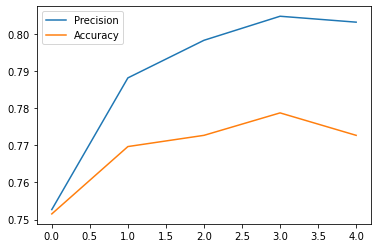

In [36]:
#Tuning for C in logistic regression
C = np.arange(0.1,5)
cl = []
ac = []
for c in C:
    h = LogisticRegression(C = c, max_iter=200 )
    h.fit(X_train, y_train)
    cl.append(precision_score(y_test, h.predict(X_test)))
    ac.append(h.score(X_test, y_test))
plt.plot(cl, label = 'Precision')
plt.plot(ac, label = 'Accuracy')
plt.legend()


After tuning we can see that highest precision value is obtaing at C=3.


In [39]:
#Using Logistic Regression
flr = LogisticRegression(C = 3, max_iter=200)
flr.fit(X_train, y_train)
print('accuracy: ', flr.score(X_test, y_test))
print('precision: ', precision_score(y_test, flr.predict(X_test)))
print('cross val score: ', cross_val_score(flr, X_test, y_test,cv = 7).mean())
print('AUC: ', roc_auc_score(y_test,flr.predict(X_test)))

accuracy:  0.7787878787878788
precision:  0.8048780487804879
cross val score:  0.6937056737588653
AUC:  0.7196471229202464


Keeping C = 3, increases our accuracy, precision and AUC compared to the default models

In [37]:
#Tuning hyperparameters for Random Forest
m1 = RandomForestClassifier()
nEst = [50,70,100]
maxDepth = [10,15,30]
paramGrid = dict(n_estimators = nEst, max_depth = maxDepth)
grid = GridSearchCV(estimator=m1, param_grid=paramGrid, cv = 3, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.761237 using {'max_depth': 10, 'n_estimators': 70}


In [38]:
m1 = RandomForestClassifier(n_estimators= 50, max_depth=15)
m1.fit(X_train, y_train)
precision_score(y_test, m1.predict(X_test))

0.7518796992481203

Since the metrics achieved by tuning hyperparameters are greater for Logistic Regression, we
will select Logistic Regression as our final model.

## ROC Curve

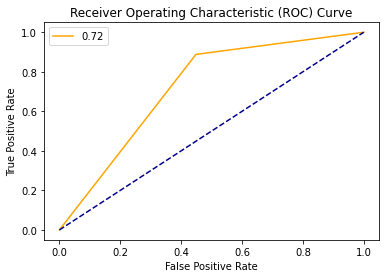

In [40]:
y_pred = flr.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr):
    roc_auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, color='orange', label=np.round(roc_auc, 3))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)


### Classification Report

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.55      0.62       107
         1.0       0.80      0.89      0.84       223

    accuracy                           0.78       330
   macro avg       0.75      0.72      0.73       330
weighted avg       0.77      0.78      0.77       330



### Confusion Matrix

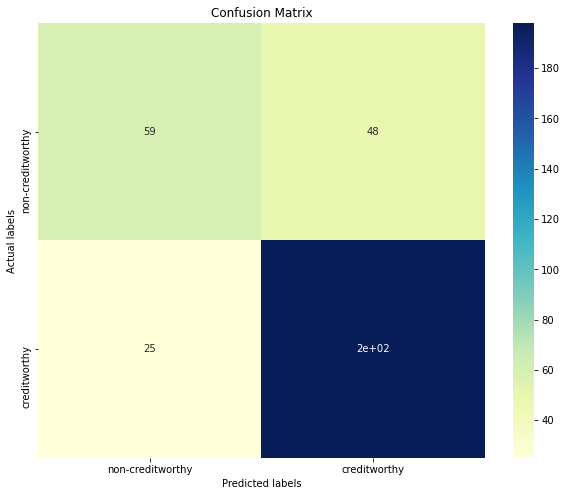

In [42]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['non-creditworthy', 'creditworthy']); ax.yaxis.set_ticklabels(['non-creditworthy', 'creditworthy']);

### Feature Importances
Since Random Forest gave the second best performance, we can use the model to visualize the
feature importances.


Text(0.5, 0, 'Feature Importances')

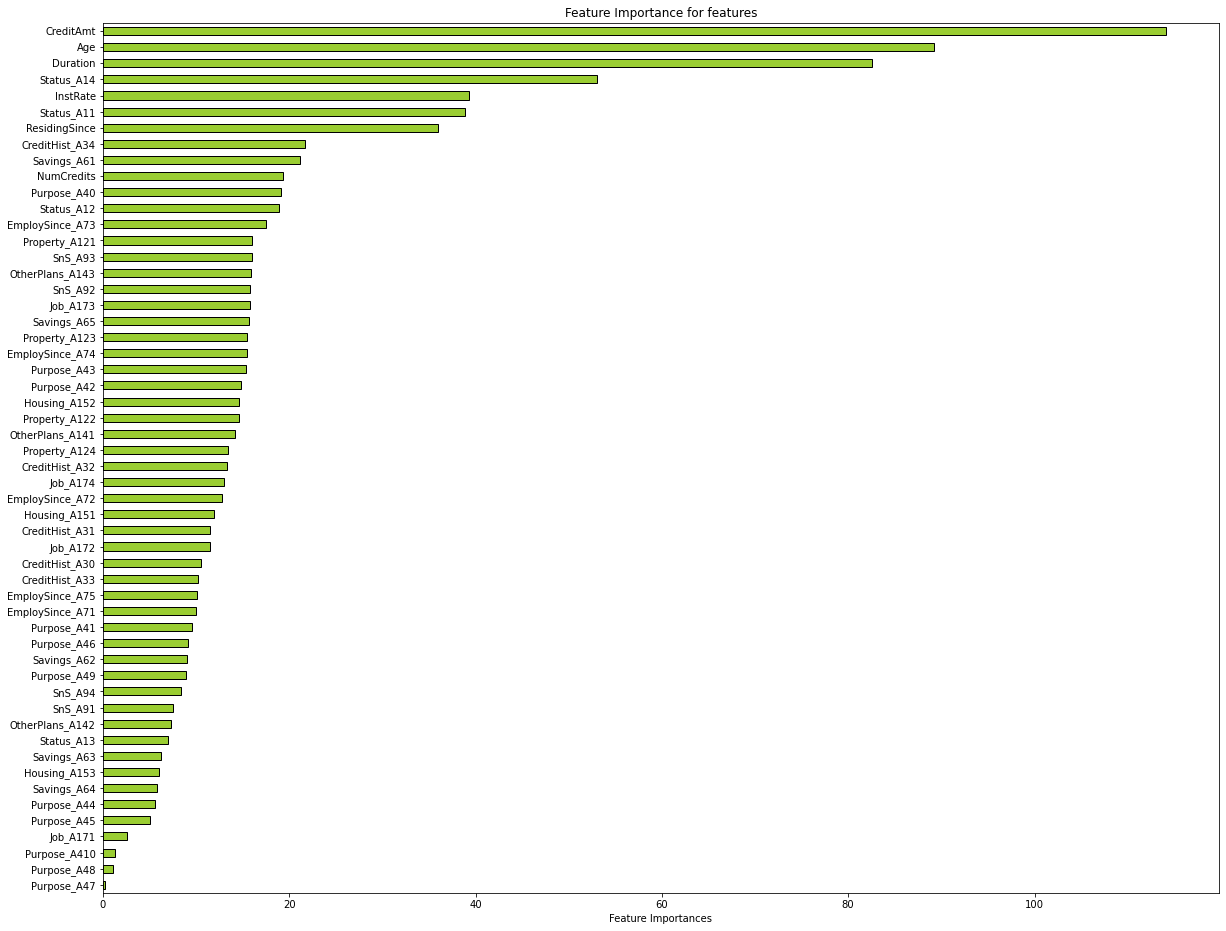

In [43]:
frf = RandomForestClassifier()
frf.fit(X, y)
fi = frf.feature_importances_
features = np.array(['Duration', 'CreditAmt', 'InstRate', 'ResidingSince','Age','NumCredits', 'Status_A11', 'Status_A12', 'Status_A13','Status_A14', 'CreditHist_A30', 'CreditHist_A31', 'CreditHist_A32','CreditHist_A33', 'CreditHist_A34', 'Savings_A61', 'Savings_A62','Savings_A63', 'Savings_A64', 'Savings_A65', 'SnS_A91', 'SnS_A92','SnS_A93', 'SnS_A94', 'Property_A121', 'Property_A122', 'Property_A123','Property_A124', 'OtherPlans_A141', 'OtherPlans_A142','OtherPlans_A143', 'Housing_A151', 'Housing_A152', 'Housing_A153','Purpose_A40', 'Purpose_A41', 'Purpose_A410', 'Purpose_A42','Purpose_A43', 'Purpose_A44', 'Purpose_A45', 'Purpose_A46','Purpose_A47', 'Purpose_A48', 'Purpose_A49', 'EmploySince_A71','EmploySince_A72', 'EmploySince_A73', 'EmploySince_A74','EmploySince_A75', 'Job_A171', 'Job_A172', 'Job_A173', 'Job_A174'])
df_fi = pd.DataFrame(fi*1000, features)
df_fi = df_fi.sort_values(0)
df_fi.plot(kind='barh', figsize = (20,16), color = 'yellowgreen', title ='Feature Importance for features', legend = False, edgecolor = 'black')
plt.xlabel('Feature Importances')

## Conclusion
To perform our binary classification task, we selected the Logistic Regression classification algorithm.
To impute missing data, we employed KNN imputation which classifies according to K nearest
neighbors.
To further increase the model’s performance, we keep the regularization parameter as 1/3.
In terms of the bank’s cost, we selected Precision as our evaluation metric since the risk associated with false positives is high. The final precision value reached is 80%.